In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download ayushmi77al/weather-data-set-for-beginners

Dataset URL: https://www.kaggle.com/datasets/ayushmi77al/weather-data-set-for-beginners
License(s): unknown
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 17.3MB/s]


In [ ]:
!unzip /content/weather-data-set-for-beginners.zip

Archive:  /content/weather-data-set-for-beginners.zip
  inflating: 1. Weather Data.csv     


# **Data Overview and Cleaning**

 Load the Dataset and Inspect

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("1. Weather Data.csv")

In [ ]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
data.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
data.shape

(8784, 8)

Identify and Handle Missing or Null Values

In [ ]:
# Check for missing or null values
missing_values = data.isnull().sum()

# Display the columns with missing values
missing_values[missing_values > 0]


,0
Weather,8784


 Check for and Handle Duplicates

In [ ]:
# Check for duplicate records
duplicates = data.duplicated().sum()

# If duplicates are found, drop them
if duplicates > 0:
    data.drop_duplicates(inplace=True)


# ** Statistical Summary**

Identifying Outliers

In [ ]:
import pandas as pd  # Import pandas for DataFrame operations

# Define a function to identify outliers using the IQR method
def identify_outliers(data, column):  # Add 'data' as a parameter
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check for outliers in key columns
outliers_temp = identify_outliers(data, 'Temp_C')  # Pass 'data' to the function
outliers_humidity = identify_outliers(data, 'Rel Hum_%')
outliers_wind_speed = identify_outliers(data, 'Wind Speed_km/h')

print(f"Temperature Outliers:\n{outliers_temp}")
print(f"Humidity Outliers:\n{outliers_humidity}")
print(f"Wind Speed Outliers:\n{outliers_wind_speed}")

Temperature Outliers:
Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []
Humidity Outliers:
            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
1984  3/23/2012 16:00    15.5              -9.0         18               22   
3066   5/7/2012 18:00    20.7              -4.4         18               13   

      Visibility_km  Press_kPa        Weather  
1984           48.3      101.6         Cloudy  
3066           48.3      101.0  Mostly Cloudy  
Wind Speed Outliers:
             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
25       1/2/2012 1:00     4.6               0.0         72               39   
32       1/2/2012 8:00     1.9              -3.3         68               39   
33       1/2/2012 9:00     1.8              -3.7         67               44   
34      1/2/2012 10:00     1.5              -4.1         66               43   
36      1/2/2012 12:

Statistical Summary

In [ ]:

# Statistical summary
summary = data.describe()
print(summary)


            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


# **Data Visualization**

Distribution of Key weather parameters.

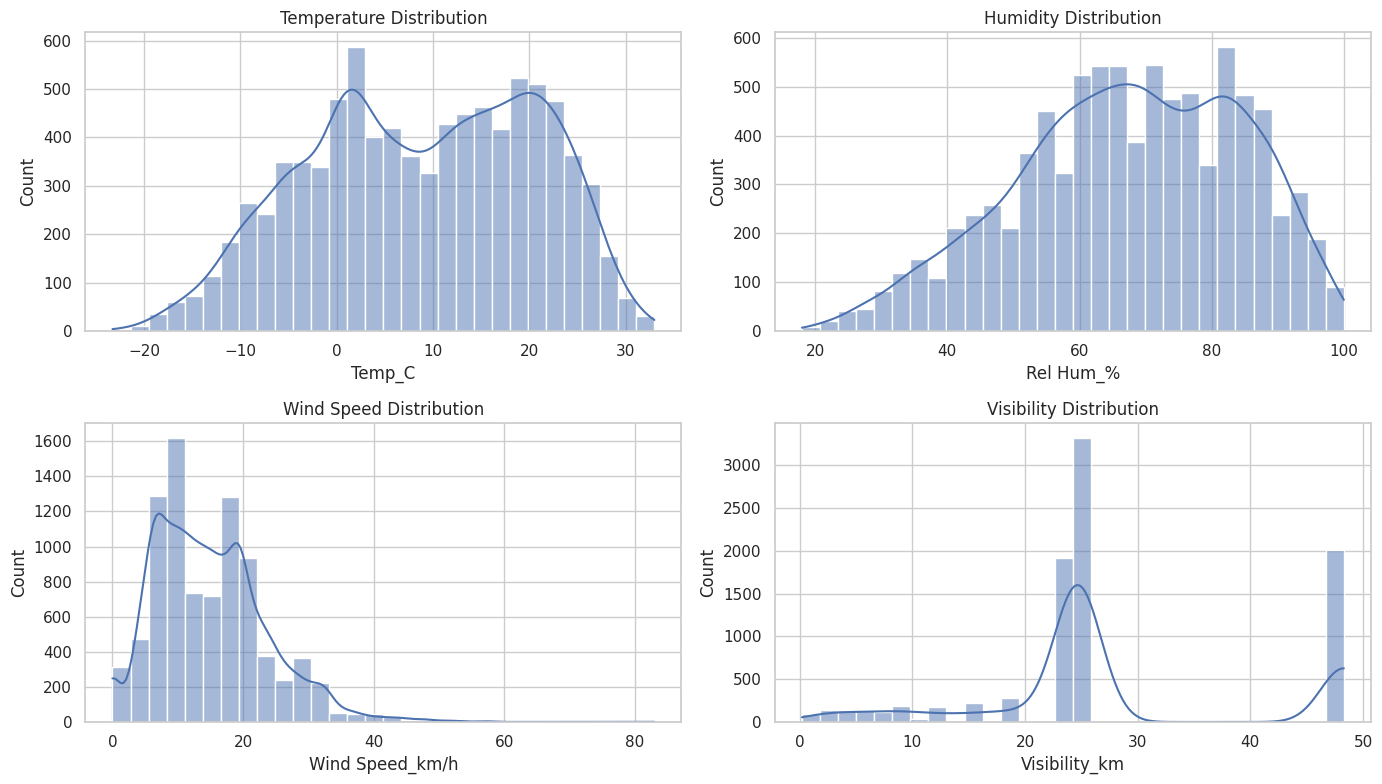

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting distributions
plt.figure(figsize=(14, 8))

# Temperature Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Temp_C'], kde=True, bins=30)
plt.title('Temperature Distribution')

# Humidity Distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Rel Hum_%'], kde=True, bins=30)
plt.title('Humidity Distribution')

# Wind Speed Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Wind Speed_km/h'], kde=True, bins=30)
plt.title('Wind Speed Distribution')

# Visibility Distribution
plt.subplot(2, 2, 4)
sns.histplot(data['Visibility_km'], kde=True, bins=30)
plt.title('Visibility Distribution')

plt.tight_layout()
plt.show()


Time Series Graphs

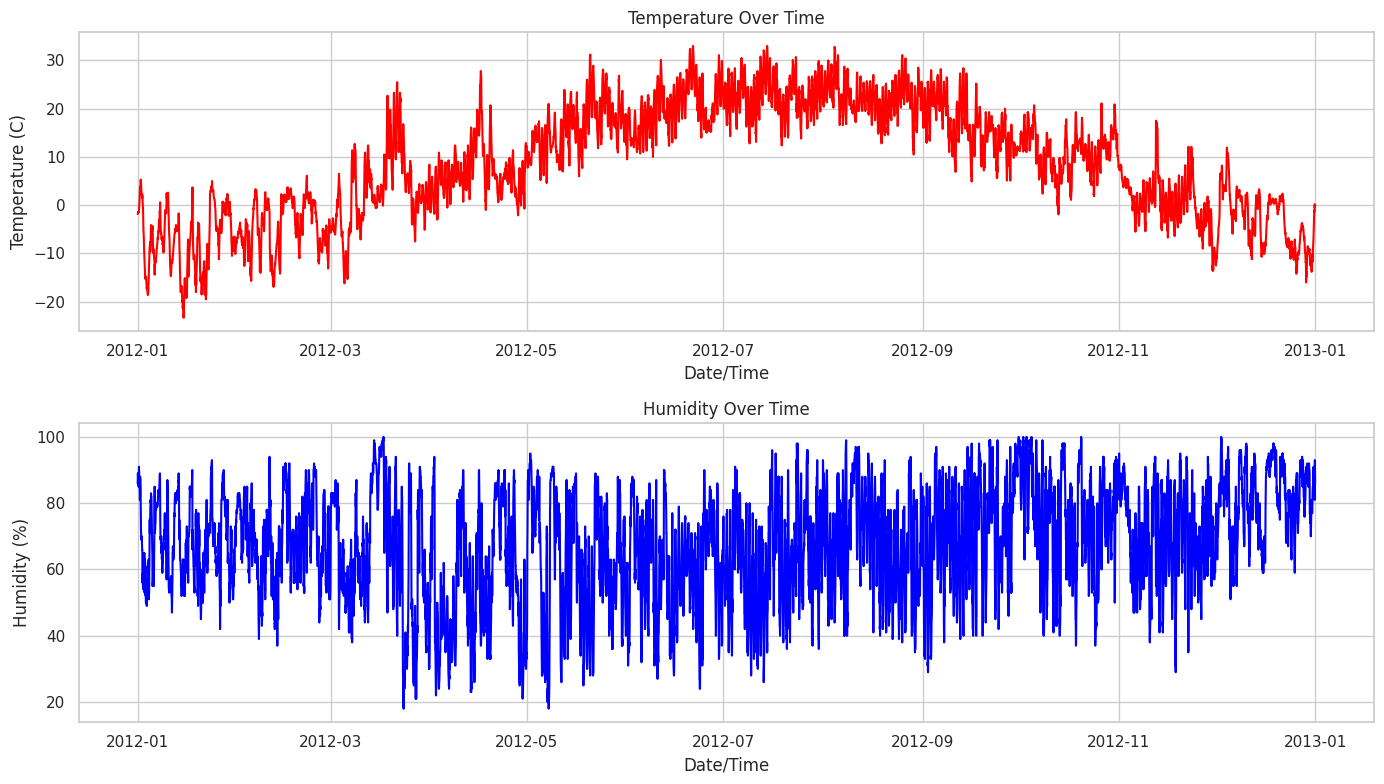

In [ ]:
# Convert Date column to datetime format if it's not already
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Plotting Time Series for Temperature and Humidity
plt.figure(figsize=(14, 8))

# Temperature over Time
plt.subplot(2, 1, 1)
plt.plot(data['Date/Time'], data['Temp_C'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')

# Humidity over Time
plt.subplot(2, 1, 2)
plt.plot(data['Date/Time'], data['Rel Hum_%'], color='blue')
plt.title('Humidity Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()


Correlation Matrix and Heatmap

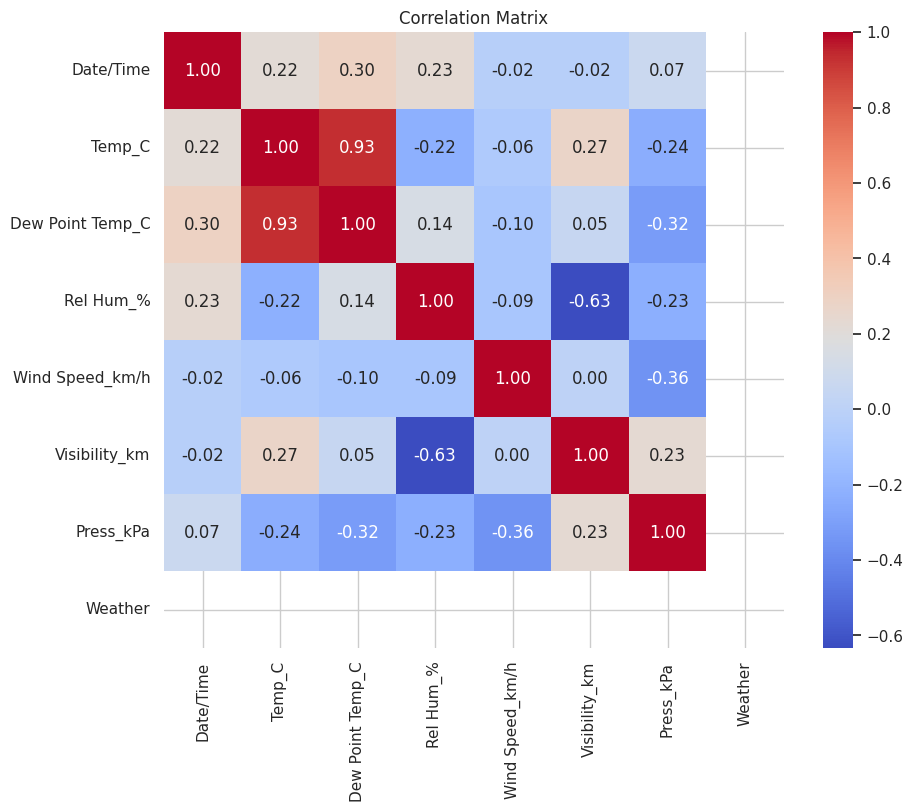

In [ ]:
# Convert non-numeric columns to numeric if applicable
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except:
            print(f"Could not convert column {col} to numeric.")

# Calculate correlation matrix after conversion
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Weather Patterns and Trends

 Seasonal Analysis

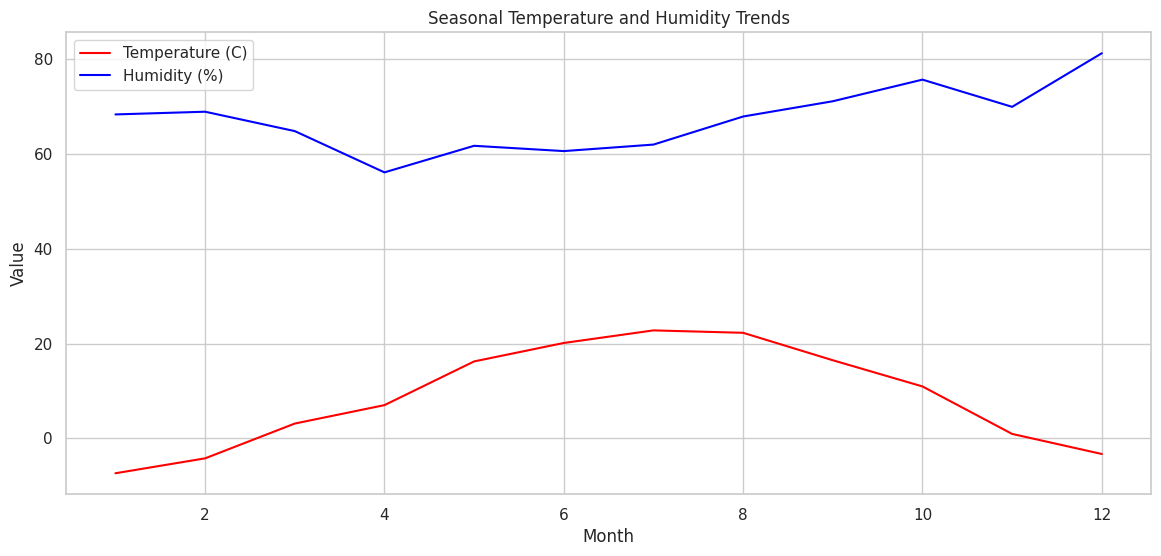

In [ ]:
# Extract month and year from Date
data['Month'] = data['Date/Time'].dt.month
data['Year'] = data['Date/Time'].dt.year

# Group by Month and calculate mean temperature and humidity
monthly_trends = data.groupby('Month').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'}).reset_index()

# Plotting Seasonal Trends
plt.figure(figsize=(14, 6))

# Temperature Seasonal Trend
plt.plot(monthly_trends['Month'], monthly_trends['Temp_C'], label='Temperature (C)', color='red')
plt.plot(monthly_trends['Month'], monthly_trends['Rel Hum_%'], label='Humidity (%)', color='blue')
plt.title('Seasonal Temperature and Humidity Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()
